In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import sys
import os
import matplotlib.pyplot as plt
%matplotlib inline
import json
import pickle
from pprint import pprint
from PIL import Image

from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, Draw, PandasTools
# from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import rdMolDraw2D

RDKit WARNING: [10:32:40] Enabling RDKit 2019.09.2 jupyter extensions


In [2]:
def make_synth_data(df, x1='property', x2='method'):
    df_synth = df[df['tb_synthesizability'] == 1]
    x1_candidate = list(set(df[x1]))
    x2_candidate = list(set(df[x2]))
    dfs = []
    for i in range(len(x1_candidate)):
        for j in range(len(x2_candidate)):
            df_temp = df_synth[df_synth[x1] == x1_candidate[i]][df_synth[x2] == x2_candidate[j]]
            df_temp['rank'] = list(range(1, len(df_temp) + 1))
            dfs.append(df_temp)
    return pd.concat(dfs)

In [3]:
df_cwo = pd.read_csv('./data/goal_hard_cwo.csv')
df_cwa = pd.read_csv('./data/goal_hard_cwa.csv')
df_cwc = pd.read_csv('./data/goal_hard_cwc.csv')

df_mwo = pd.read_csv('./data/goal_hard_mwo.csv')
df_mwa = pd.read_csv('./data/goal_hard_mwa.csv')
df_mwc = pd.read_csv('./data/goal_hard_mwc.csv')

In [4]:
df_mwc

,SMILES,tb_synthesizability,tb_depth,tb_plausibility,tb_price,property,len_smiles,method,rank,objective,dataset,type
0,COc1ncccc1CNC(=O)c1cccnc1OCC(F)F,1,2,0.968891,47.0,Sitagliptin MPO,32,best_from_chembl,1,0.382852,moses,wc
1,O=C(CNC(=O)NCc1ccc(F)cc1)NCc1ccc(F)cc1,1,3,0.996101,7.0,Sitagliptin MPO,38,best_from_chembl,2,0.376759,moses,wc
2,Cc1ccc(S(=O)(=O)NCc2cn(-c3ccccc3)nn2)cc1,1,2,0.998994,80.0,Sitagliptin MPO,40,best_from_chembl,3,0.365344,moses,wc
3,O=C(Cn1cnnn1)Nc1c(F)cccc1OCc1ccccc1,1,3,0.992442,45.0,Sitagliptin MPO,35,best_from_chembl,4,0.357038,moses,wc
4,CC(C)(C)NS(=O)(=O)c1ccc(C(=O)NCC(F)(F)F)cc1,1,2,0.998480,75.0,Sitagliptin MPO,43,best_from_chembl,5,0.355259,moses,wc
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,COc1cc2c(NNc3ncnc4cc(OBr)c(OBr)cc34)ncnc2cc1OBr,0,11,0.000000,-1.0,Deco Hop,47,graph_ga,96,0.881747,moses,wc
3996,BrOc1cc2ncnc(NNc3ncnc4cc(OBr)c(OBr)cc34)c2cc1OBr,0,11,0.000000,-1.0,Deco Hop,48,graph_ga,97,0.881747,moses,wc
3997,COc1cc2ncnc(NNc3ncnc4ccc(Br)cc34)c2cc1OC,1,2,0.984953,20.0,Deco Hop,40,graph_ga,98,0.881043,moses,wc
3998,COc1cc2c(NNc3ncnc4ccc(Br)cc34)ncnc2cc1OBr,0,11,0.000000,-1.0,Deco Hop,41,graph_ga,99,0.881043,moses,wc


In [5]:
df = df_mwo
df_mwo_top = df[df['rank'] == 1]
df_mwo_top.reset_index(drop=True, inplace=True)
df = make_synth_data(df_mwo)
df_mwo_top_synth = df[df['rank'] == 1]
df_mwo_top_synth.reset_index(drop=True, inplace=True)

df = df_mwa
df_mwa_top = df[df['rank'] == 1]
df_mwa_top.reset_index(drop=True, inplace=True)
df = make_synth_data(df_mwa)
df_mwa_top_synth = df[df['rank'] == 1]
df_mwa_top_synth.reset_index(drop=True, inplace=True)

df = df_mwc
df_mwc_top = df[df['rank'] == 1]
df_mwc_top.reset_index(drop=True, inplace=True)
df = make_synth_data(df_mwc)
df_mwc_top_synth = df[df['rank'] == 1]
df_mwc_top_synth.reset_index(drop=True, inplace=True)

df = df_cwo
df_cwo_top = df[df['rank'] == 1]
df_cwo_top.reset_index(drop=True, inplace=True)
df = make_synth_data(df_cwo)
df_cwo_top_synth = df[df['rank'] == 1]
df_cwo_top_synth.reset_index(drop=True, inplace=True)

df = df_cwa
df_cwa_top = df[df['rank'] == 1]
df_cwa_top.reset_index(drop=True, inplace=True)
df = make_synth_data(df_cwa)
df_cwa_top_synth = df[df['rank'] == 1]
df_cwa_top_synth.reset_index(drop=True, inplace=True)

df = df_cwc
df_cwc_top = df[df['rank'] == 1]
df_cwc_top.reset_index(drop=True, inplace=True)
df = make_synth_data(df_cwc)
df_cwc_top_synth = df[df['rank'] == 1]
df_cwc_top_synth.reset_index(drop=True, inplace=True)

/usr/local/Caskroom/miniconda/base/envs/rdkit/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [6]:
df_cwc_top_synth

,SMILES,tb_synthesizability,tb_depth,tb_plausibility,tb_price,property,len_smiles,method,rank,objective,dataset,type
0,CCOC(=O)c1cnc(C)nc1Nc1cccc2ccccc12,1,2,0.942031,19.0,Zaleplon MPO,34,graph_ga,1.0,0.489798,chembl,wc
1,CCOC(=O)c1cnc(SC)nc1Nc1cccc2ccccc12,1,1,0.999481,4.0,Zaleplon MPO,35,best_from_chembl,1.0,0.488890,chembl,wc
2,CCOC(=O)c1cnc(SC)nc1Nc1cccc2ccccc12,1,1,0.999481,4.0,Zaleplon MPO,35,smiles_ga,1.0,0.488890,chembl,wc
3,CC(=O)N(Cc1ncc(C)o1)c1cccc(-c2ccccc2)c1,1,5,0.995470,13.0,Zaleplon MPO,39,smiles_lstm,1.0,0.578390,chembl,wc
4,CCCC(NC(=O)C(=O)c1c[nH]c2ccccc12)C(=O)OCC,1,2,0.954173,14.0,Perindopril MPO,41,graph_ga,1.0,0.534522,chembl,wc
5,CCOC(=O)c1sc2nc(NC(=O)C3CCCCC3)sc2c1C,1,2,0.988972,97.0,Perindopril MPO,37,best_from_chembl,1.0,0.497701,chembl,wc
6,CCOC(=O)c1sc2nc(NC(=O)C3CCCCC3)sc2c1C,1,2,0.988972,97.0,Perindopril MPO,37,smiles_ga,1.0,0.497701,chembl,wc
7,CCOC(=O)C(Cc1cc2ccccc2n1C)NC(=O)C(CC1CCCCC1)NC...,1,10,0.340814,130.0,Perindopril MPO,55,smiles_lstm,1.0,0.619139,chembl,wc
8,O=C(CCO)C(=O)CC(=O)C1CCC(=O)N1Cc1ccc(-c2ccccc2...,1,6,0.176911,53.0,Valsartan SMARTS,50,graph_ga,1.0,0.249669,chembl,wc
9,O=C1CCC(N2C(=O)c3ccc(-c4ccccc4)cc3C2=O)C(=O)N1,1,2,0.999564,11.0,Valsartan SMARTS,46,best_from_chembl,1.0,0.603368,chembl,wc


In [136]:
def view_diff(before, after, before_synth, after_synth):
    ps = [
        'Osimertinib MPO',
        'Fexofenadine MPO',
        'Ranolazine MPO',
        'Perindopril MPO',
        'Amlodipine MPO',
        'Sitagliptin MPO',
        'Zaleplon MPO',
        'Valsartan SMARTS',
        'Deco Hop',
        'Scaffold Hop',
    ]

    ms = [
        'best_from_chembl',
        'smiles_ga',
        'smiles_lstm',
        'graph_ga'
    ]
    dfs = []
    for prop in ps:
        for meth in ms:
            tmp_before = before[before['method'] == meth][before['property'] == prop]
            tmp_after = after[after['method'] == meth][after['property'] == prop]
            tmp_before.reset_index(drop=True, inplace=True)
            tmp_after.reset_index(drop=True, inplace=True)
            
            tmp_before_synth = before_synth[before_synth['method'] == meth][before_synth['property'] == prop]
            tmp_after_synth = after_synth[after_synth['method'] == meth][after_synth['property'] == prop]
            tmp_before_synth.reset_index(drop=True, inplace=True)
            tmp_after_synth.reset_index(drop=True, inplace=True)
            
            tmp = pd.DataFrame({
                'SMILES_before': tmp_before.SMILES,
                'SMILES_before_synth': tmp_before_synth.SMILES,
                'SMILES_after': tmp_after.SMILES,
                'SMILES_after_synth': tmp_after_synth.SMILES,
                'syn_before': tmp_before.tb_synthesizability,
                'syn_after': tmp_after.tb_synthesizability,
                'syn_changed': tmp_after.tb_synthesizability - tmp_before.tb_synthesizability,
                'obj_before': tmp_before.objective,
                'obj_before_synth': tmp_before_synth.objective,
                'obj_after': tmp_after.objective,
                'obj_after_synth': tmp_after_synth.objective,
                'obj_changed': tmp_after.objective - tmp_before.objective,
                'obj_changed_synth': tmp_after_synth.objective - tmp_before_synth.objective,
                'property': prop,
                'method': meth
            })
            dfs.append(tmp)
#     return pd.concat(dfs)
    result = pd.concat(dfs)
    result.reset_index(drop=True, inplace=True)
    return result

In [255]:
change_top_cwa = view_diff(df_cwo_top, df_cwa_top, df_cwo_top_synth, df_cwa_top_synth)
change_top_cwc = view_diff(df_cwo_top, df_cwc_top, df_cwo_top_synth, df_cwc_top_synth)
change_top_mwa = view_diff(df_mwo_top, df_mwa_top, df_mwo_top_synth, df_mwa_top_synth)
change_top_mwc = view_diff(df_mwo_top, df_mwc_top, df_mwo_top_synth, df_mwc_top_synth)

# change_top_synth_cwa = view_diff(df_cwo_top_synth, df_cwa_top_synth)
# change_top_synth_cwc = view_diff(df_cwo_top_synth, df_cwc_top_synth)
# change_top_synth_mwa = view_diff(df_mwa_top_synth, df_mwa_top_synth)
# change_top_synth_mwc = view_diff(df_mwo_top_synth, df_mwc_top_synth)

/usr/local/Caskroom/miniconda/base/envs/rdkit/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/Caskroom/miniconda/base/envs/rdkit/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/Caskroom/miniconda/base/envs/rdkit/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/Caskroom/miniconda/base/envs/rdkit/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [300]:
change_top_cwa.to_csv('./data/change_cwa.csv', index=False)
change_top_cwc.to_csv('./data/change_cwc.csv', index=False)
change_top_mwa.to_csv('./data/change_mwa.csv', index=False)
change_top_mwc.to_csv('./data/change_mwc.csv', index=False)

# Start from Here!

In [45]:
change_top_cwa = pd.read_csv('./data/change_cwa.csv')
change_top_cwc = pd.read_csv('./data/change_cwc.csv')
change_top_mwa = pd.read_csv('./data/change_mwa.csv')
change_top_mwc = pd.read_csv('./data/change_mwc.csv')

In [8]:
df1 = change_top_cwa
df2 = change_top_cwc
p1 = df1[np.isnan(df1['obj_changed_synth'])]

p1

,SMILES_before,SMILES_before_synth,SMILES_after,SMILES_after_synth,syn_before,syn_after,syn_changed,obj_before,obj_before_synth,obj_after,obj_after_synth,obj_changed,obj_changed_synth,property,method
1,BN1CN(CC(N)=O)CN[IH]1(S)c1cc(OC)c(Nc2ncc3bbc(-...,NaN,COc1ccc(OC)c(NC(=O)CNC(=O)Cn2cnc3ccccc3c2=O)c1,COc1ccc(OC)c(NC(=O)CNC(=O)Cn2cnc3ccccc3c2=O)c1,0,1,1,0.881585,NaN,0.837125,0.837125,-0.044460,NaN,Osimertinib MPO,smiles_ga
9,Cc1cppc(F)c1NC(=O)IN1CCC(CC(O)COc2ccpcc2OO)CC1,NaN,COc1ccc(C(=O)c2ccc(OCC(=O)N3CCC(CCCC4CCN(C(=O)...,COc1ccc(C(=O)c2ccc(OCC(=O)N3CCC(CCCC4CCN(C(=O)...,0,1,1,0.885233,NaN,0.798754,0.798754,-0.086478,NaN,Ranolazine MPO,smiles_ga
11,Cc1cccc(CCCCCCCCC(O)COc2cccc(C)c2OO)c1NC(=O)OC=CF,NaN,COc1ccccc1NC(=O)CCCCCCCCCCCCOc1ccc(F)c([N+](=O...,COc1ccccc1NC(=O)CCCCCCCCCCCCOc1ccc(F)c([N+](=O...,0,1,1,0.910261,NaN,0.867506,0.867506,-0.042755,NaN,Ranolazine MPO,graph_ga
13,CC(NC(Cc1nbcnn1)C(=O)OCC(=O)N1C(C(=O)O)CC2CCCC...,NaN,CCOC(=O)c1nc2cc(C(=O)O)ccc2n1C1CCCCC1,CCOC(=O)c1nc2cc(C(=O)O)ccc2n1C1CCCCC1,0,1,1,0.661041,NaN,0.509175,0.509175,-0.151866,NaN,Perindopril MPO,smiles_ga
15,CCOC(=O)C(CCc1n[nH][nH]1)NC(C)C(=O)N1C(C(=O)c2...,NaN,CCCc1ccc2c(c1)c(C(=O)OCC)c(C(=O)O)n2CC(=O)NC1C...,CCCc1ccc2c(c1)c(C(=O)OCC)c(C(=O)O)n2CC(=O)NC1C...,0,1,1,0.784960,NaN,0.559964,0.559964,-0.224996,NaN,Perindopril MPO,graph_ga
17,C=C1NC(=O)PN1CCOCC1NC(C)=C(C(=O)OC)C(c2ccccc2C...,NaN,CCOC(=O)C1=C(C)NC(C)=C(C(=O)OCC)C1c1csc2ccccc12,CCOC(=O)C1=C(C)NC(C)=C(C(=O)OCC)C1c1csc2ccccc12,0,1,1,0.725800,NaN,0.689730,0.689730,-0.036070,NaN,Amlodipine MPO,smiles_ga
23,OC(NN=CC1=CC=CC(F)C1F)(C1=CC(F)C(F)C(F)C1F)n1c...,NaN,O=C(NCC(=O)N(CF)NN=Cc1ccc(F)cc1)c1ccc(F)cc1,Cn1c(CC(=O)NNC(=O)CCC(F)(F)C(F)F)nc2ccccc21,0,0,0,0.843677,NaN,0.602538,0.586020,-0.241139,NaN,Sitagliptin MPO,graph_ga
37,CCc1cnc2nc(OCCC[IH2](CC)CI)c(C)cc2c1Nc1ccc2nc(...,NaN,CCN(CC)CCCOc1cc2ncc(C#N)c(Nc3ccc4nc(N)sc4c3)c2...,CCN(CC)CCCOc1cc2ncc(C#N)c(Nc3ccc4nc(N)sc4c3)c2...,0,1,1,0.885063,NaN,0.827729,0.827729,-0.057334,NaN,Scaffold Hop,smiles_ga


In [47]:
df1 = change_top_cwa
df2 = change_top_cwc
p1 = df1[np.isnan(df1['obj_changed_synth'])]

tmp = p1
mol_list = []
legend_list = []

# from_list = list(tmp.index)
from_list = [9, 11, 13, 15, 17, 23, 37]

for i, x in enumerate(from_list):
    mol_list = []
    legend_list = []

#     for x in from_list:
    try:
        mol_list  = mol_list + [Chem.MolFromSmiles(df1.SMILES_before[x]), Chem.MolFromSmiles(df1.SMILES_after_synth[x]), Chem.MolFromSmiles(df2.SMILES_after_synth[x])]
        legend_list = legend_list + [df1.property[x] + ' ' + df1.method[x] + ': Top but unsynthesizable: ' + str(df1.obj_before[x])[:5], 
                                     'Top synthesizable SA_Score Biased: ' + str(df1.obj_after[x])[:5], 'Top synthesizable SCScore Biased: ' + str(df2.obj_after[x])[:5]]
    except:
        mol_list  = mol_list + [Chem.MolFromSmiles(df1.SMILES_before[x]), Chem.MolFromSmiles(df1.SMILES_after_synth[x]), Chem.MolFromSmiles(df2.SMILES_after[x])]
        legend_list = legend_list + [df1.property[x] + ' ' + df1.method[x] + ': Top but unsynthesizable: ' + str(df1.obj_before[x])[:5], 
                                     'Top synthesizable SA_Score Biased: ' + str(df1.obj_after[x])[:5], 'Top unsynthesizable SCScore Biased: ' + str(df2.obj_after[x])[:5] + '(No synthesizable candidate found)']

    # img = Draw.MolsToGridImage(mol_list, molsPerRow=3, subImgSize=(500, 300), maxMols=3 * len(tmp),
    #                            legends=legend_list) #, useSVG=True)
    # # print(len(tmp))
    # img.save('figure/nan2synth_c.png')
    # img

    molsPerRow = 3
    subImgSize= (800,600)

    nRows = len(mol_list) // molsPerRow
    if len(mol_list) % molsPerRow:
        nRows += 1
    fullSize = (molsPerRow * subImgSize[0] + 50, nRows * subImgSize[1])
    d2d = rdMolDraw2D.MolDraw2DCairo(fullSize[0],fullSize[1],subImgSize[0], subImgSize[1])
    d2d.drawOptions().legendFontSize=25
    d2d.DrawMolecules(mol_list,legends=legend_list)
    d2d.FinishDrawing()
    name = 'figure/nan2synth_c' + str(i+1) + '.png'
    open(name,'wb+').write(d2d.GetDrawingText())
# Image.open('figure/nan2synth_1.png')

In [48]:
df1 = change_top_mwa
df2 = change_top_mwc
p1 = df1[np.isnan(df1['obj_changed_synth'])]

tmp = p1
mol_list = []
legend_list = []

# from_list = list(tmp.index)
from_list = [1, 7, 9, 11, 33]

for i, x in enumerate(from_list):
    mol_list = []
    legend_list = []

#     for x in from_list:
    try:
        mol_list  = mol_list + [Chem.MolFromSmiles(df1.SMILES_before[x]), Chem.MolFromSmiles(df1.SMILES_after_synth[x]), Chem.MolFromSmiles(df2.SMILES_after_synth[x])]
        legend_list = legend_list + [df1.property[x] + ' ' + df1.method[x] + ': Top but unsynthesizable: ' + str(df1.obj_before[x])[:5], 
                                     'Top synthesizable SA_Score Biased: ' + str(df1.obj_after[x])[:5], 'Top synthesizable SCScore Biased: ' + str(df2.obj_after[x])[:5]]
    except:
        mol_list  = mol_list + [Chem.MolFromSmiles(df1.SMILES_before[x]), Chem.MolFromSmiles(df1.SMILES_after_synth[x]), Chem.MolFromSmiles(df2.SMILES_after[x])]
        legend_list = legend_list + [df1.property[x] + ' ' + df1.method[x] + ': Top but unsynthesizable: ' + str(df1.obj_before[x])[:5], 
                                     'Top synthesizable SA_Score Biased: ' + str(df1.obj_after[x])[:5], 'Top unsynthesizable SCScore Biased: ' + str(df2.obj_after[x])[:5] + '(No synthesizable candidate found)']

    # img = Draw.MolsToGridImage(mol_list, molsPerRow=3, subImgSize=(500, 300), maxMols=3 * len(tmp),
    #                            legends=legend_list) #, useSVG=True)
    # # print(len(tmp))
    # img.save('figure/nan2synth_c.png')
    # img

    molsPerRow = 3
    subImgSize= (800,600)

    nRows = len(mol_list) // molsPerRow
    if len(mol_list) % molsPerRow:
        nRows += 1
    fullSize = (molsPerRow * subImgSize[0] + 50, nRows * subImgSize[1])
    d2d = rdMolDraw2D.MolDraw2DCairo(fullSize[0],fullSize[1],subImgSize[0], subImgSize[1])
    d2d.drawOptions().legendFontSize=25
    d2d.DrawMolecules(mol_list,legends=legend_list)
    d2d.FinishDrawing()
    name = 'figure/nan2synth_m' + str(i+1) + '.png'
    open(name,'wb+').write(d2d.GetDrawingText())
# Image.open('figure/nan2synth_1.png')

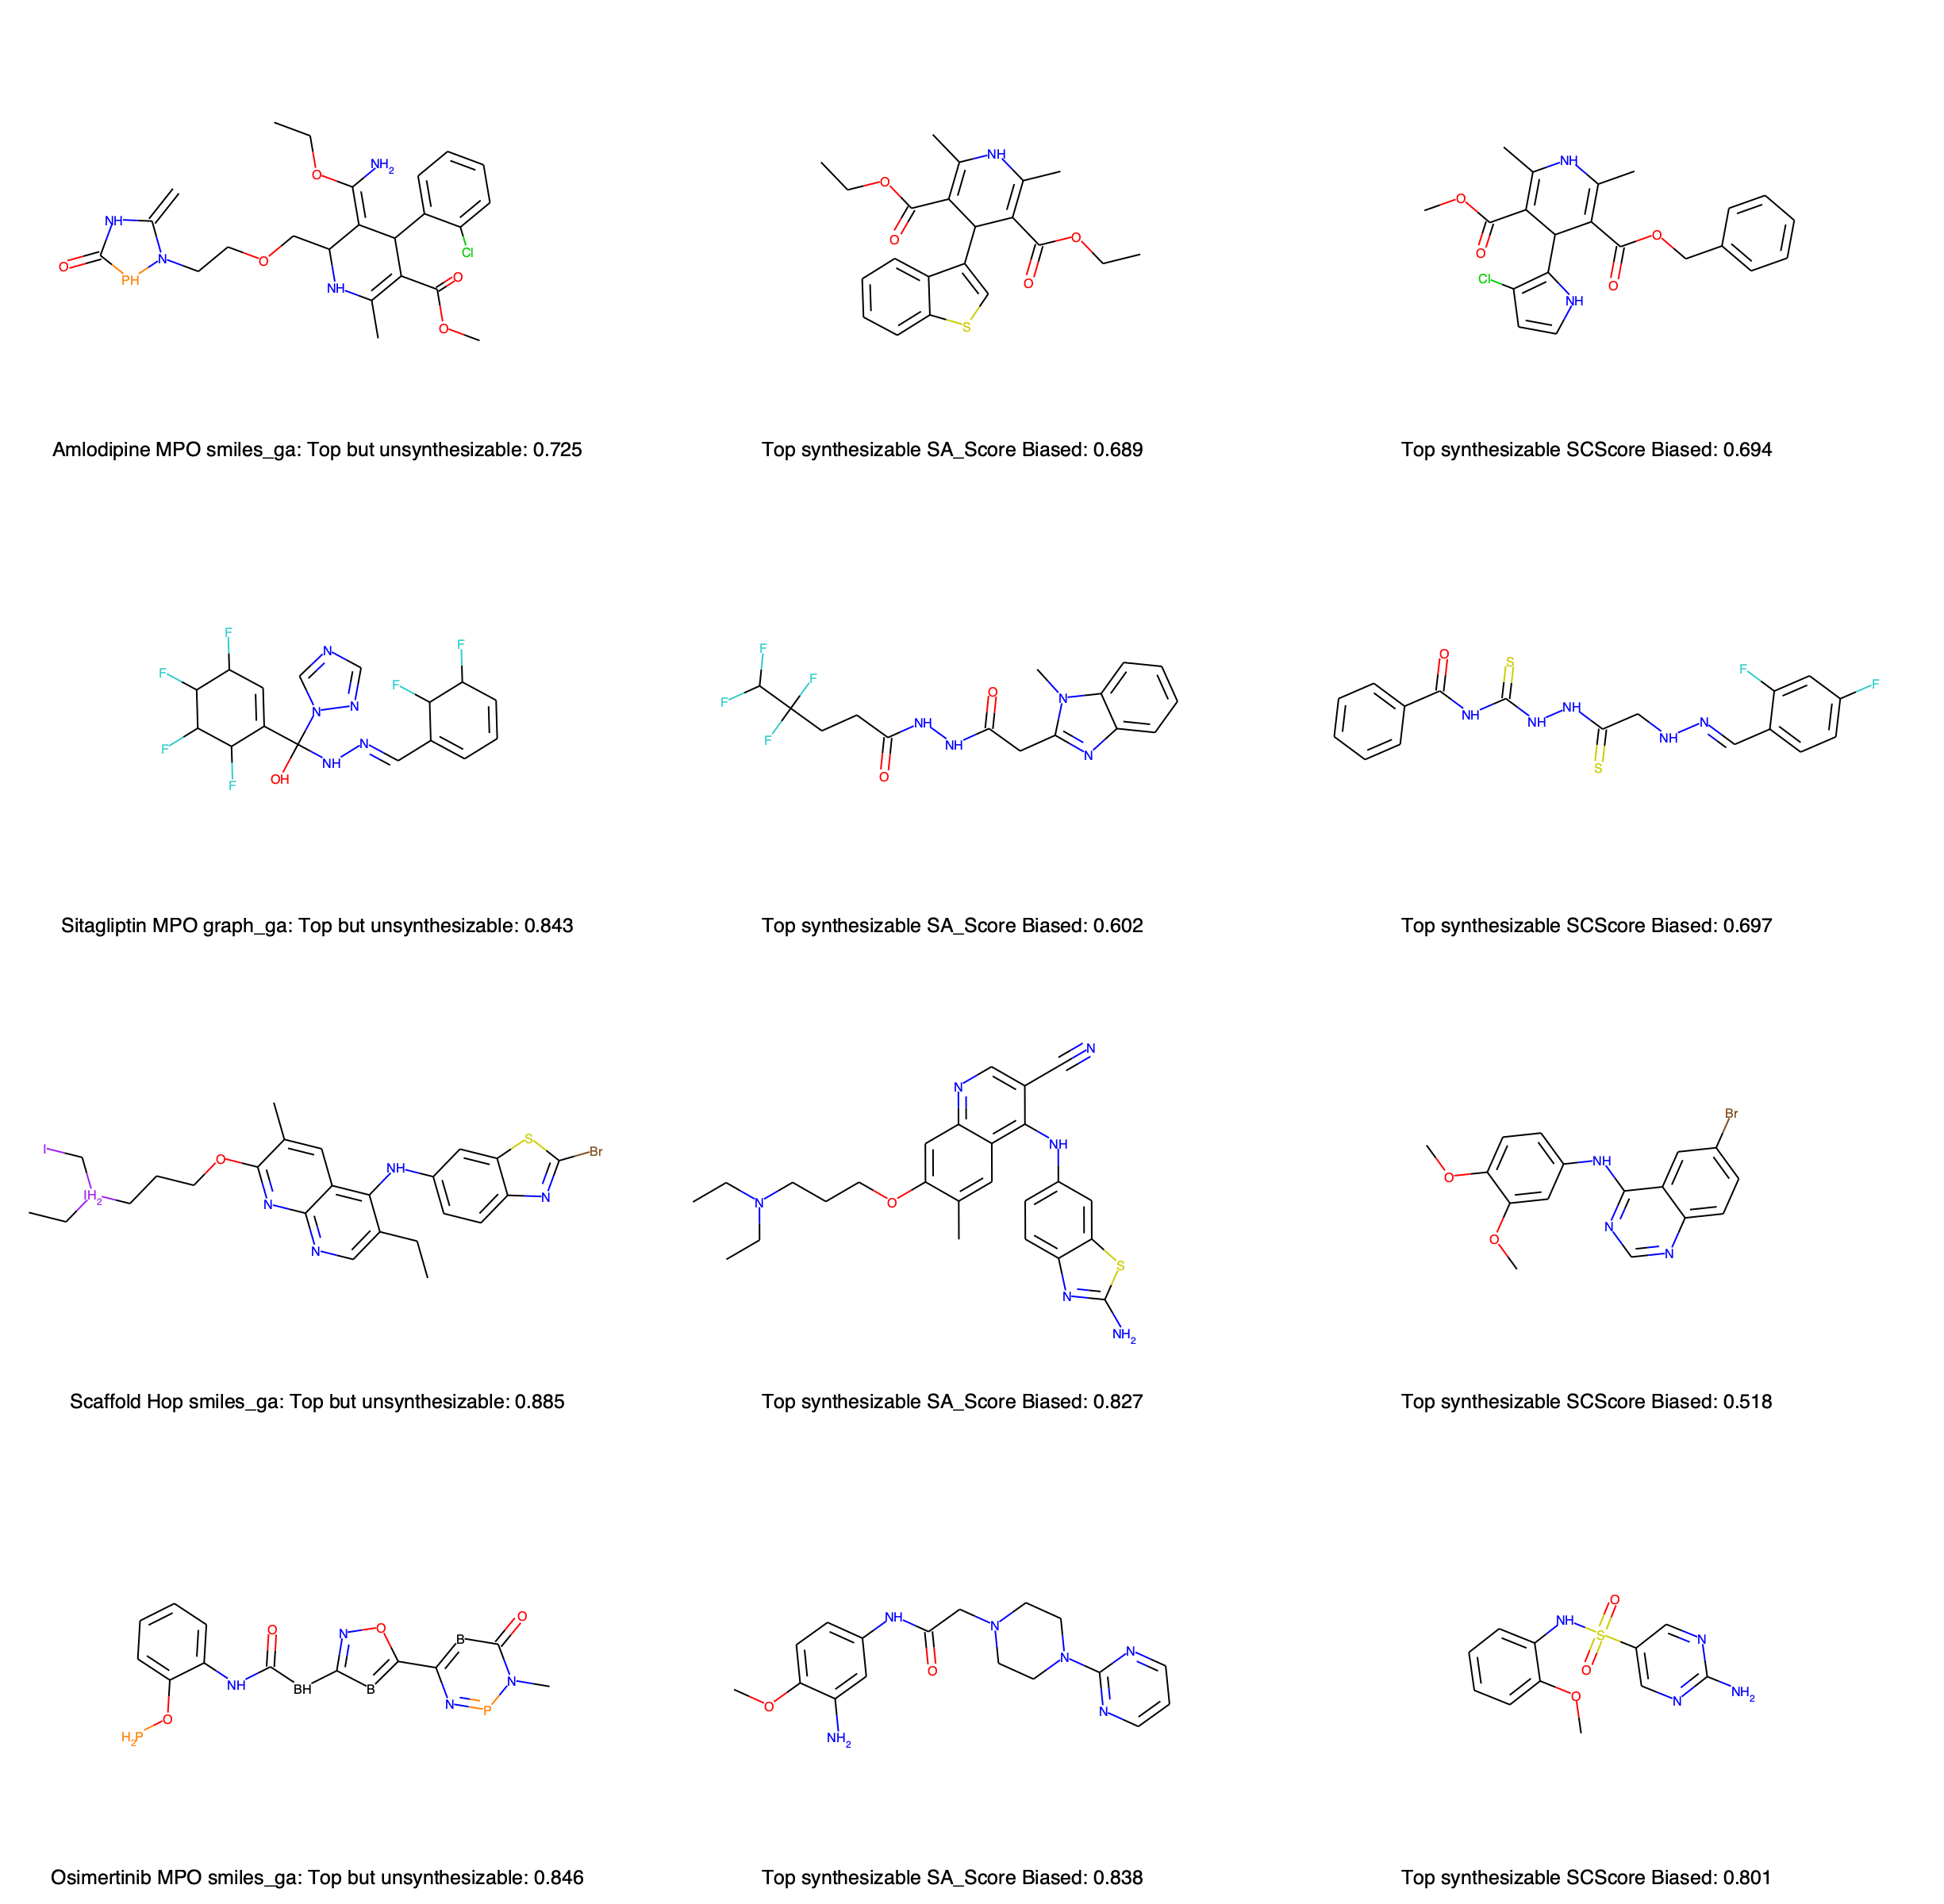

In [17]:
df1 = change_top_cwa
df2 = change_top_cwc
p1 = df1[np.isnan(df1['obj_changed_synth'])]

tmp = p1
mol_list = []
legend_list = []

# from_list = list(tmp.index)
from_list = [17, 23, 37]

for x in from_list:
    try:
        mol_list  = mol_list + [Chem.MolFromSmiles(df1.SMILES_before[x]), Chem.MolFromSmiles(df1.SMILES_after_synth[x]), Chem.MolFromSmiles(df2.SMILES_after_synth[x])]
        legend_list = legend_list + [df1.property[x] + ' ' + df1.method[x] + ': Top but unsynthesizable: ' + str(df1.obj_before[x])[:5], 
                                     'Top synthesizable SA_Score Biased: ' + str(df1.obj_after[x])[:5], 'Top synthesizable SCScore Biased: ' + str(df2.obj_after[x])[:5]]
    except:
        mol_list  = mol_list + [Chem.MolFromSmiles(df1.SMILES_before[x]), Chem.MolFromSmiles(df1.SMILES_after_synth[x]), Chem.MolFromSmiles(df2.SMILES_after[x])]
        legend_list = legend_list + [df1.property[x] + ' ' + df1.method[x] + ': Top but unsynthesizable: ' + str(df1.obj_before[x])[:5], 
                                     'Top synthesizable SA_Score Biased: ' + str(df1.obj_after[x])[:5], 'Top unsynthesizable SCScore Biased: ' + str(df2.obj_after[x])[:5] + '(No synthesizable candidate found)']


df1 = change_top_mwa
df2 = change_top_mwc
p1 = df1[np.isnan(df1['obj_changed_synth'])]
# from_list = list(tmp.index)
from_list = [1]

for x in from_list:
    try:
        mol_list  = mol_list + [Chem.MolFromSmiles(df1.SMILES_before[x]), Chem.MolFromSmiles(df1.SMILES_after_synth[x]), Chem.MolFromSmiles(df2.SMILES_after_synth[x])]
        legend_list = legend_list + [df1.property[x] + ' ' + df1.method[x] + ': Top but unsynthesizable: ' + str(df1.obj_before[x])[:5], 
                                     'Top synthesizable SA_Score Biased: ' + str(df1.obj_after[x])[:5], 'Top synthesizable SCScore Biased: ' + str(df2.obj_after[x])[:5]]
    except:
        mol_list  = mol_list + [Chem.MolFromSmiles(df1.SMILES_before[x]), Chem.MolFromSmiles(df1.SMILES_after_synth[x]), Chem.MolFromSmiles(df2.SMILES_after[x])]
        legend_list = legend_list + [df1.property[x] + ' ' + df1.method[x] + ': Top but unsynthesizable: ' + str(df1.obj_before[x])[:5], 
                                     'Top synthesizable SA_Score Biased: ' + str(df1.obj_after[x])[:5], 'Top unsynthesizable SCScore Biased: ' + str(df2.obj_after[x])[:5] + '(No synthesizable candidate found)']
        
molsPerRow = 3
subImgSize= (800,600)

nRows = len(mol_list) // molsPerRow
if len(mol_list) % molsPerRow:
    nRows += 1
fullSize = (molsPerRow * subImgSize[0] + 50, nRows * subImgSize[1])
d2d = rdMolDraw2D.MolDraw2DCairo(fullSize[0],fullSize[1],subImgSize[0], subImgSize[1])
d2d.drawOptions().legendFontSize=25
d2d.DrawMolecules(mol_list,legends=legend_list)
d2d.FinishDrawing()
open('figure/nan2synth_2.png','wb+').write(d2d.GetDrawingText())
Image.open('figure/nan2synth_2.png')

In [14]:
df1 = change_top_mwa
df2 = change_top_mwc
p1 = df1[np.isnan(df1['obj_changed_synth'])]
p1

,SMILES_before,SMILES_before_synth,SMILES_after,SMILES_after_synth,syn_before,syn_after,syn_changed,obj_before,obj_before_synth,obj_after,obj_after_synth,obj_changed,obj_changed_synth,property,method
1,Cn1pnc(-c2bc(BC(=O)Nc3ccccc3OP)no2)bc1=O,NaN,COc1ccc(NC(=O)CN2CCN(c3ncccn3)CC2)cc1N,COc1ccc(NC(=O)CN2CCN(c3ncccn3)CC2)cc1N,0,1,1,0.846173,NaN,0.838753,0.838753,-0.007420,NaN,Osimertinib MPO,smiles_ga
7,O=C(O)C(O)(C1=CCN(CCCC(O)(c2ccccc2)C(CO)c2cccc...,NaN,O=C(O)c1ccc(CNC2CCN(CCC(=O)C(O)(c3ccccc3)c3ccc...,O=C(O)c1ccc(CNC2CCN(CCC(=O)C(O)(c3ccccc3)c3ccc...,0,1,1,0.898030,NaN,0.878671,0.878671,-0.019359,NaN,Fexofenadine MPO,graph_ga
9,Cc1pccc(F)c1NC(=O)IP1CCN(CP(O)COc2cccpc2OO)CC1,NaN,Cc1cccc(C(C)C)c1NC(=O)c1cc(C2CC2)nc2onc(Br)c12,Cc1cccc(NC(=O)Nc2ccc(-c3noc(C4CCC4)n3)cc2)c1,0,0,0,0.875366,NaN,0.381188,0.343039,-0.494178,NaN,Ranolazine MPO,smiles_ga
11,Cc1cccc(OC=CO)c1NC(=O)CCCCCCC(C)CON(F)c1ccc(C)...,NaN,Cc1c(NC(=O)CC2CCCCC2)cccc1NC(=O)Nc1ccc(OC(=O)C...,Cc1c(NC(=O)CC2CCCCC2)cccc1NC(=O)Nc1ccc(OC(=O)C...,0,1,1,0.905269,NaN,0.829281,0.829281,-0.075988,NaN,Ranolazine MPO,graph_ga
23,CC1=C(C(O)(n2cncn2)C2(F)N=CN=CC2C)C(F)C(F)C(F)C1F,NaN,CC(=O)NCCNC(=O)c1ccc(-n2ccc(C(F)(F)C(F)F)n2)cc1,CC(=O)NCCNC(=O)c1ccc(-n2ccc(C(F)(F)C(F)F)n2)cc1,0,1,1,0.821437,NaN,0.615358,0.615358,-0.206079,NaN,Sitagliptin MPO,graph_ga
33,FIc1cc2c(Nc3ccc4cnsc4c3)ncnc2cc1OI,NaN,COc1cc2ncnc(Nc3ccc4c(c3)OCN4)c2cc1OC,COc1cc2ncnc(Nc3ccc4c(c3)OCN4)c2cc1OC,0,1,1,0.963708,NaN,0.920665,0.920665,-0.043043,NaN,Deco Hop,smiles_ga


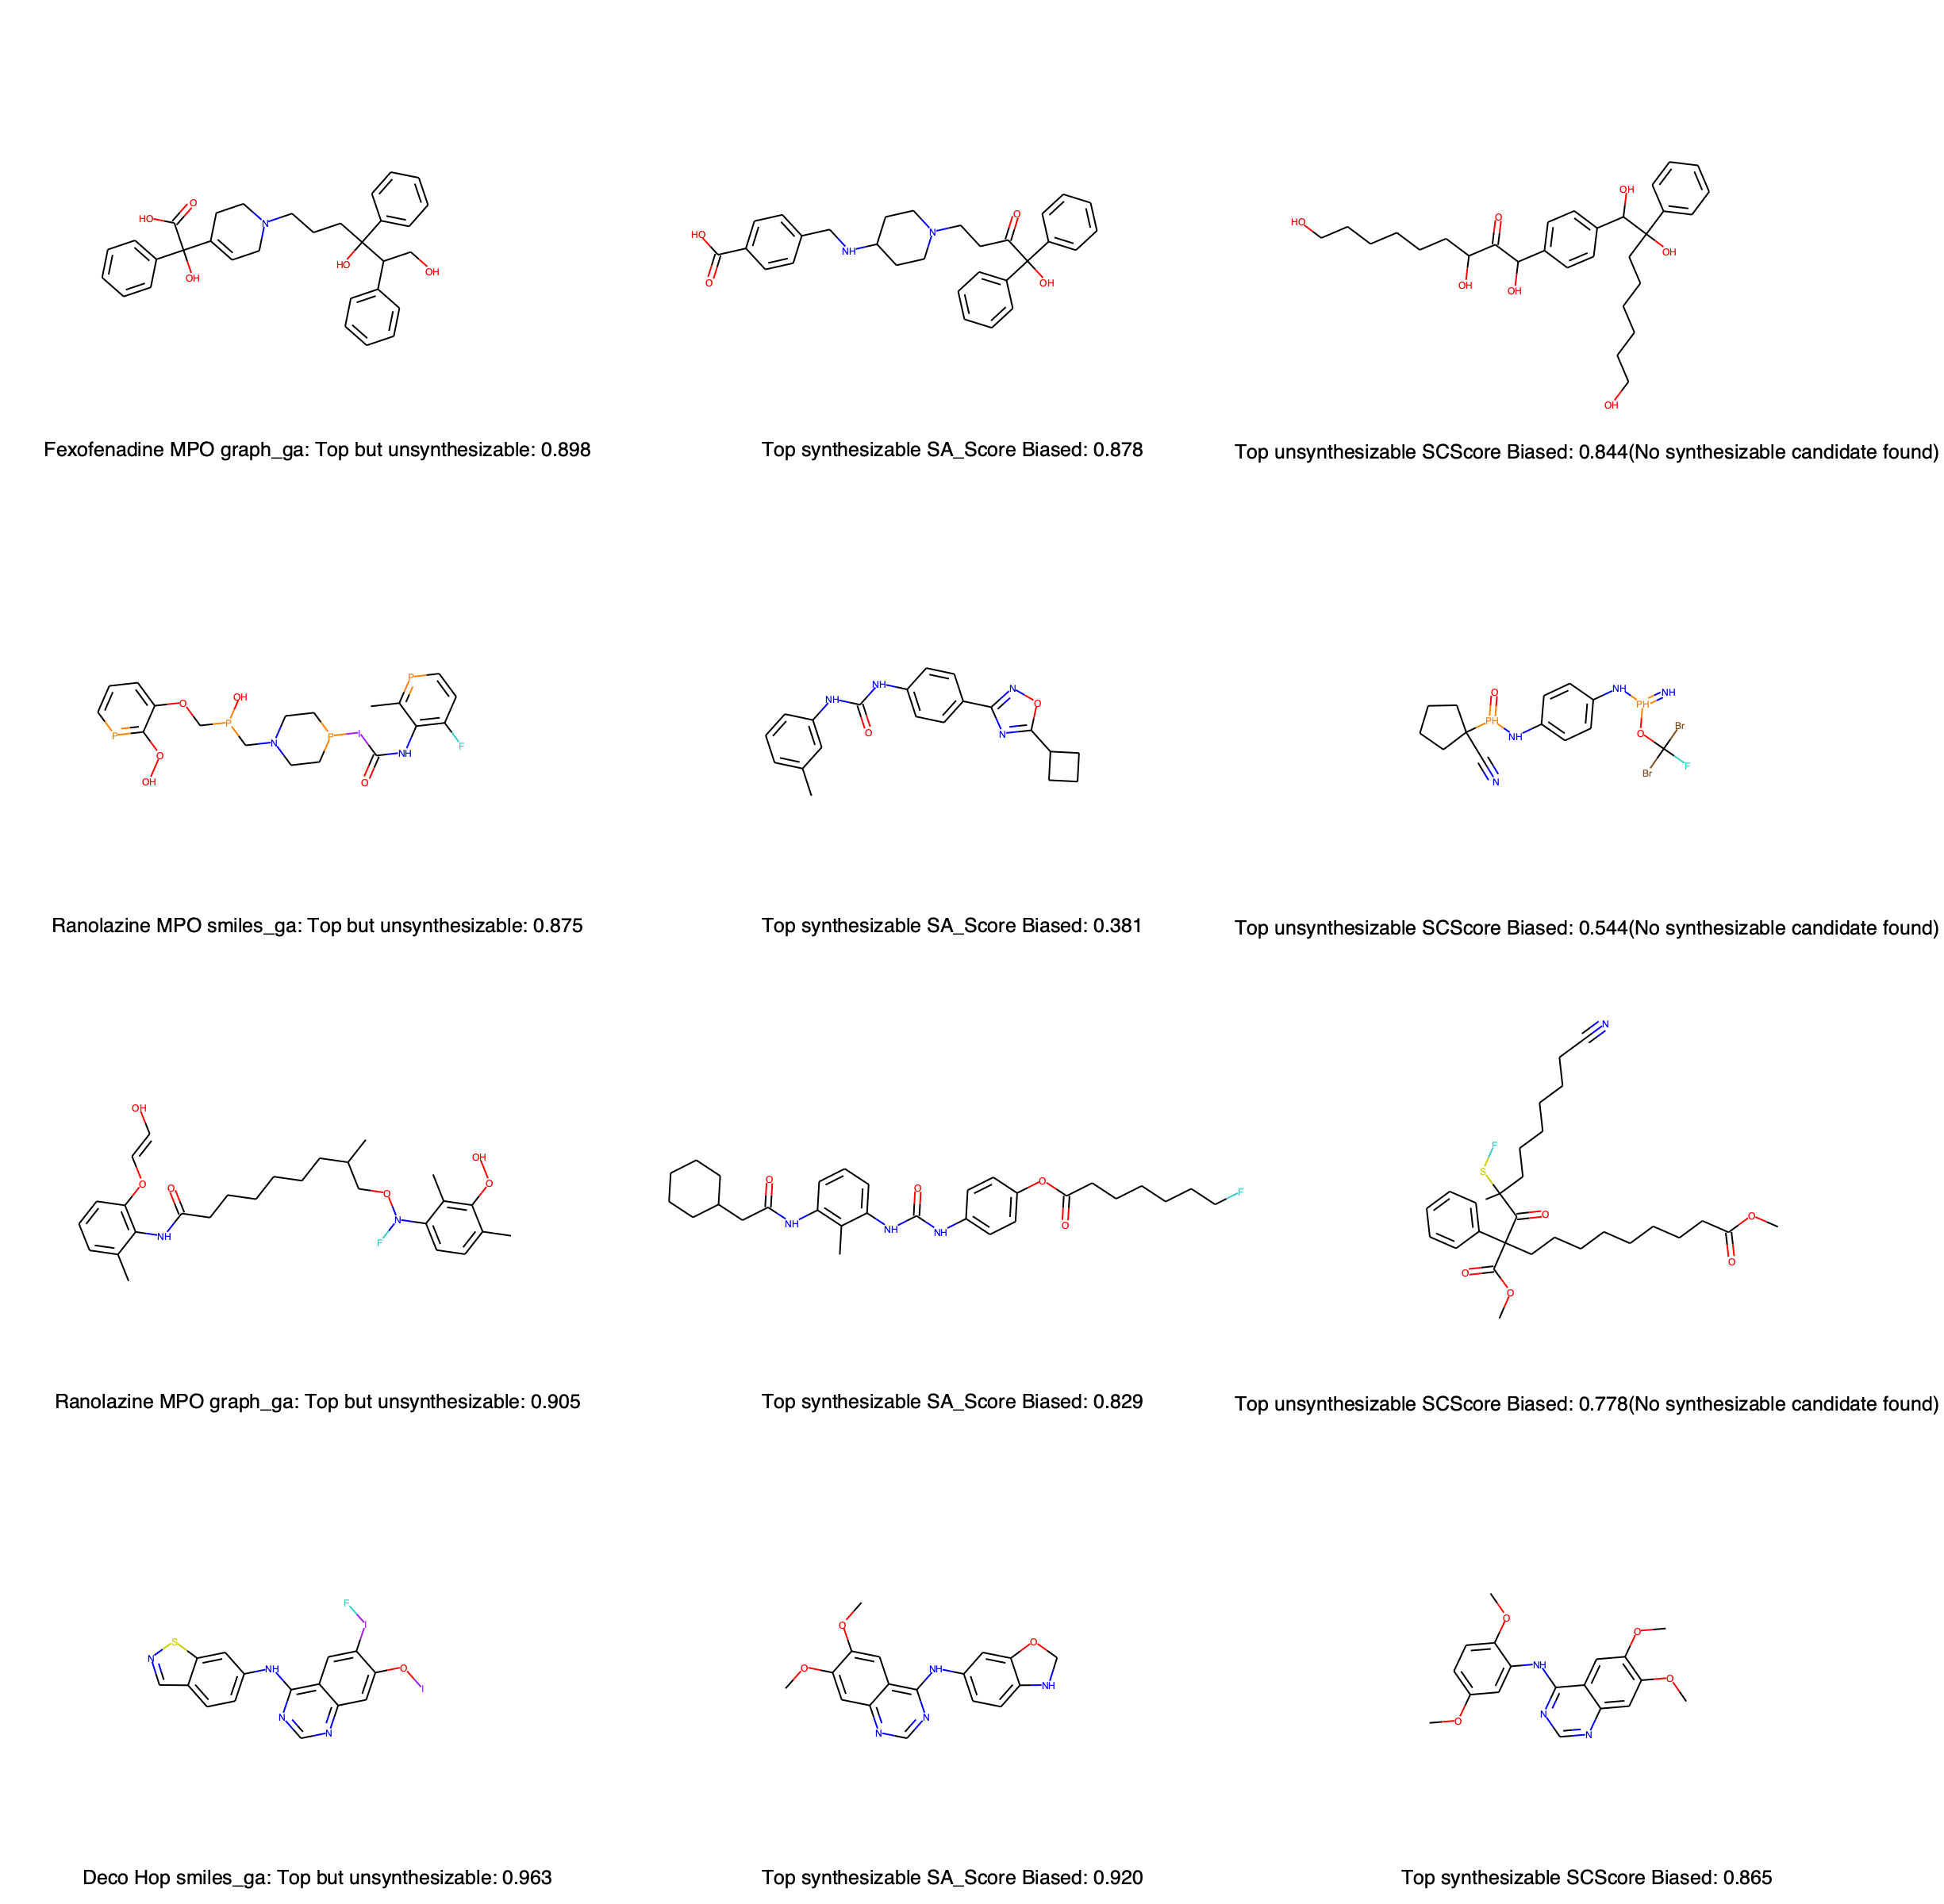

In [18]:
df1 = change_top_mwa
df2 = change_top_mwc
p1 = df1[np.isnan(df1['obj_changed_synth'])]

tmp = p1
mol_list = []
legend_list = []
# from_list = list(tmp.index)
from_list = [7, 9, 11, 33]

for x in from_list:
    try:
        mol_list  = mol_list + [Chem.MolFromSmiles(df1.SMILES_before[x]), Chem.MolFromSmiles(df1.SMILES_after_synth[x]), Chem.MolFromSmiles(df2.SMILES_after_synth[x])]
        legend_list = legend_list + [df1.property[x] + ' ' + df1.method[x] + ': Top but unsynthesizable: ' + str(df1.obj_before[x])[:5], 
                                     'Top synthesizable SA_Score Biased: ' + str(df1.obj_after[x])[:5], 'Top synthesizable SCScore Biased: ' + str(df2.obj_after[x])[:5]]
    except:
        mol_list  = mol_list + [Chem.MolFromSmiles(df1.SMILES_before[x]), Chem.MolFromSmiles(df1.SMILES_after_synth[x]), Chem.MolFromSmiles(df2.SMILES_after[x])]
        legend_list = legend_list + [df1.property[x] + ' ' + df1.method[x] + ': Top but unsynthesizable: ' + str(df1.obj_before[x])[:5], 
                                     'Top synthesizable SA_Score Biased: ' + str(df1.obj_after[x])[:5], 'Top unsynthesizable SCScore Biased: ' + str(df2.obj_after[x])[:5] + '(No synthesizable candidate found)']


molsPerRow = 3
subImgSize= (800,600)

nRows = len(mol_list) // molsPerRow
if len(mol_list) % molsPerRow:
    nRows += 1
fullSize = (molsPerRow * subImgSize[0] + 50, nRows * subImgSize[1])
d2d = rdMolDraw2D.MolDraw2DCairo(fullSize[0],fullSize[1],subImgSize[0], subImgSize[1])
d2d.drawOptions().legendFontSize=25
d2d.DrawMolecules(mol_list,legends=legend_list)
d2d.FinishDrawing()
open('figure/nan2synth_3.png','wb+').write(d2d.GetDrawingText())
Image.open('figure/nan2synth_3.png')

In [20]:
df1 = change_top_mwa
df2 = change_top_mwc
p1 = df1[df1['obj_changed_synth'] > 0.01][df1['syn_changed'] != 2]
p2 = df2[df2['obj_changed_synth'] > 0.01][df2['syn_changed'] != 2]
tmp = list(set(p1.index) | set(p2.index))
tmp = list(np.sort(tmp))
tmp

/usr/local/Caskroom/miniconda/base/envs/rdkit/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/Caskroom/miniconda/base/envs/rdkit/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


[10, 22, 26, 35]

In [50]:
df1 = change_top_cwa
df2 = change_top_cwc
p1 = df1[df1['obj_changed_synth'] > 0.01][df1['syn_changed'] != 2]
p2 = df2[df2['obj_changed_synth'] > 0.01][df2['syn_changed'] != 2]
tmp = list(set(p1.index) | set(p2.index))
tmp = list(np.sort(tmp))
tmp = [22]
mol_list = []
legend_list = []
for x in tmp:
    mol_list  = mol_list + [Chem.MolFromSmiles(df1.SMILES_before[x]), Chem.MolFromSmiles(df1.SMILES_before_synth[x]), Chem.MolFromSmiles(df1.SMILES_after_synth[x]), Chem.MolFromSmiles(df2.SMILES_after_synth[x])]
    legend_list = legend_list + [df1.property[x] + ' ' + df1.method[x] + ': Top but unsynthesizable: ' + str(df1.obj_before[x])[:5], 'Top synthesizable: ' + str(df1.obj_before_synth[x])[:5],
                                     'Top synthesizable SA_Score Biased: ' + str(df1.obj_after[x])[:5], 'Top synthesizable SCScore Biased: ' + str(df2.obj_after[x])[:5]]

molsPerRow = 4
subImgSize= (800,600)

nRows = len(mol_list) // molsPerRow
if len(mol_list) % molsPerRow:
    nRows += 1
fullSize = (molsPerRow * subImgSize[0], nRows * subImgSize[1])
d2d = rdMolDraw2D.MolDraw2DCairo(fullSize[0],fullSize[1],subImgSize[0], subImgSize[1])
d2d.drawOptions().legendFontSize=25
d2d.DrawMolecules(mol_list,legends=legend_list)
d2d.FinishDrawing()
open('figure/synth2improve_c1.png','wb+').write(d2d.GetDrawingText())
# Image.open('figure/synth2improve_cm.png')
    
tmp1 = tmp
df1 = change_top_mwa
df2 = change_top_mwc
p1 = df1[df1['obj_changed_synth'] > 0.01][df1['syn_changed'] != 2]
p2 = df2[df2['obj_changed_synth'] > 0.01][df2['syn_changed'] != 2]
tmp = list(set(p1.index) | set(p2.index))
tmp = list(np.sort(tmp))
tmp = [10, 22, 26]
tmp2 = tmp

for i, x in enumerate(tmp):
    mol_list = []
    legend_list = []

#     for x in tmp:
    mol_list  = mol_list + [Chem.MolFromSmiles(df1.SMILES_before[x]), Chem.MolFromSmiles(df1.SMILES_before_synth[x]), Chem.MolFromSmiles(df1.SMILES_after_synth[x]), Chem.MolFromSmiles(df2.SMILES_after_synth[x])]
    legend_list = legend_list + [df1.property[x] + ' ' + df1.method[x] + ': Top but unsynthesizable: ' + str(df1.obj_before[x])[:5], 'Top synthesizable: ' + str(df1.obj_before_synth[x])[:5],
                                     'Top synthesizable SA_Score Biased: ' + str(df1.obj_after[x])[:5], 'Top synthesizable SCScore Biased: ' + str(df2.obj_after[x])[:5]]

    molsPerRow = 4
    subImgSize= (800,600)

    nRows = len(mol_list) // molsPerRow
    if len(mol_list) % molsPerRow:
        nRows += 1
    fullSize = (molsPerRow * subImgSize[0], nRows * subImgSize[1])
    d2d = rdMolDraw2D.MolDraw2DCairo(fullSize[0],fullSize[1],subImgSize[0], subImgSize[1])
    d2d.drawOptions().legendFontSize=25
    d2d.DrawMolecules(mol_list,legends=legend_list)
    d2d.FinishDrawing()
    name = 'figure/synth2improve_m' + str(i+1) + '.png'
    open(name,'wb+').write(d2d.GetDrawingText())
# Image.open('figure/synth2improve_cm.png')

/usr/local/Caskroom/miniconda/base/envs/rdkit/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/Caskroom/miniconda/base/envs/rdkit/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/Caskroom/miniconda/base/envs/rdkit/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/Caskroom/miniconda/base/envs/rdkit/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


/usr/local/Caskroom/miniconda/base/envs/rdkit/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/Caskroom/miniconda/base/envs/rdkit/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/Caskroom/miniconda/base/envs/rdkit/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/Caskroom/miniconda/base/envs/rdkit/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


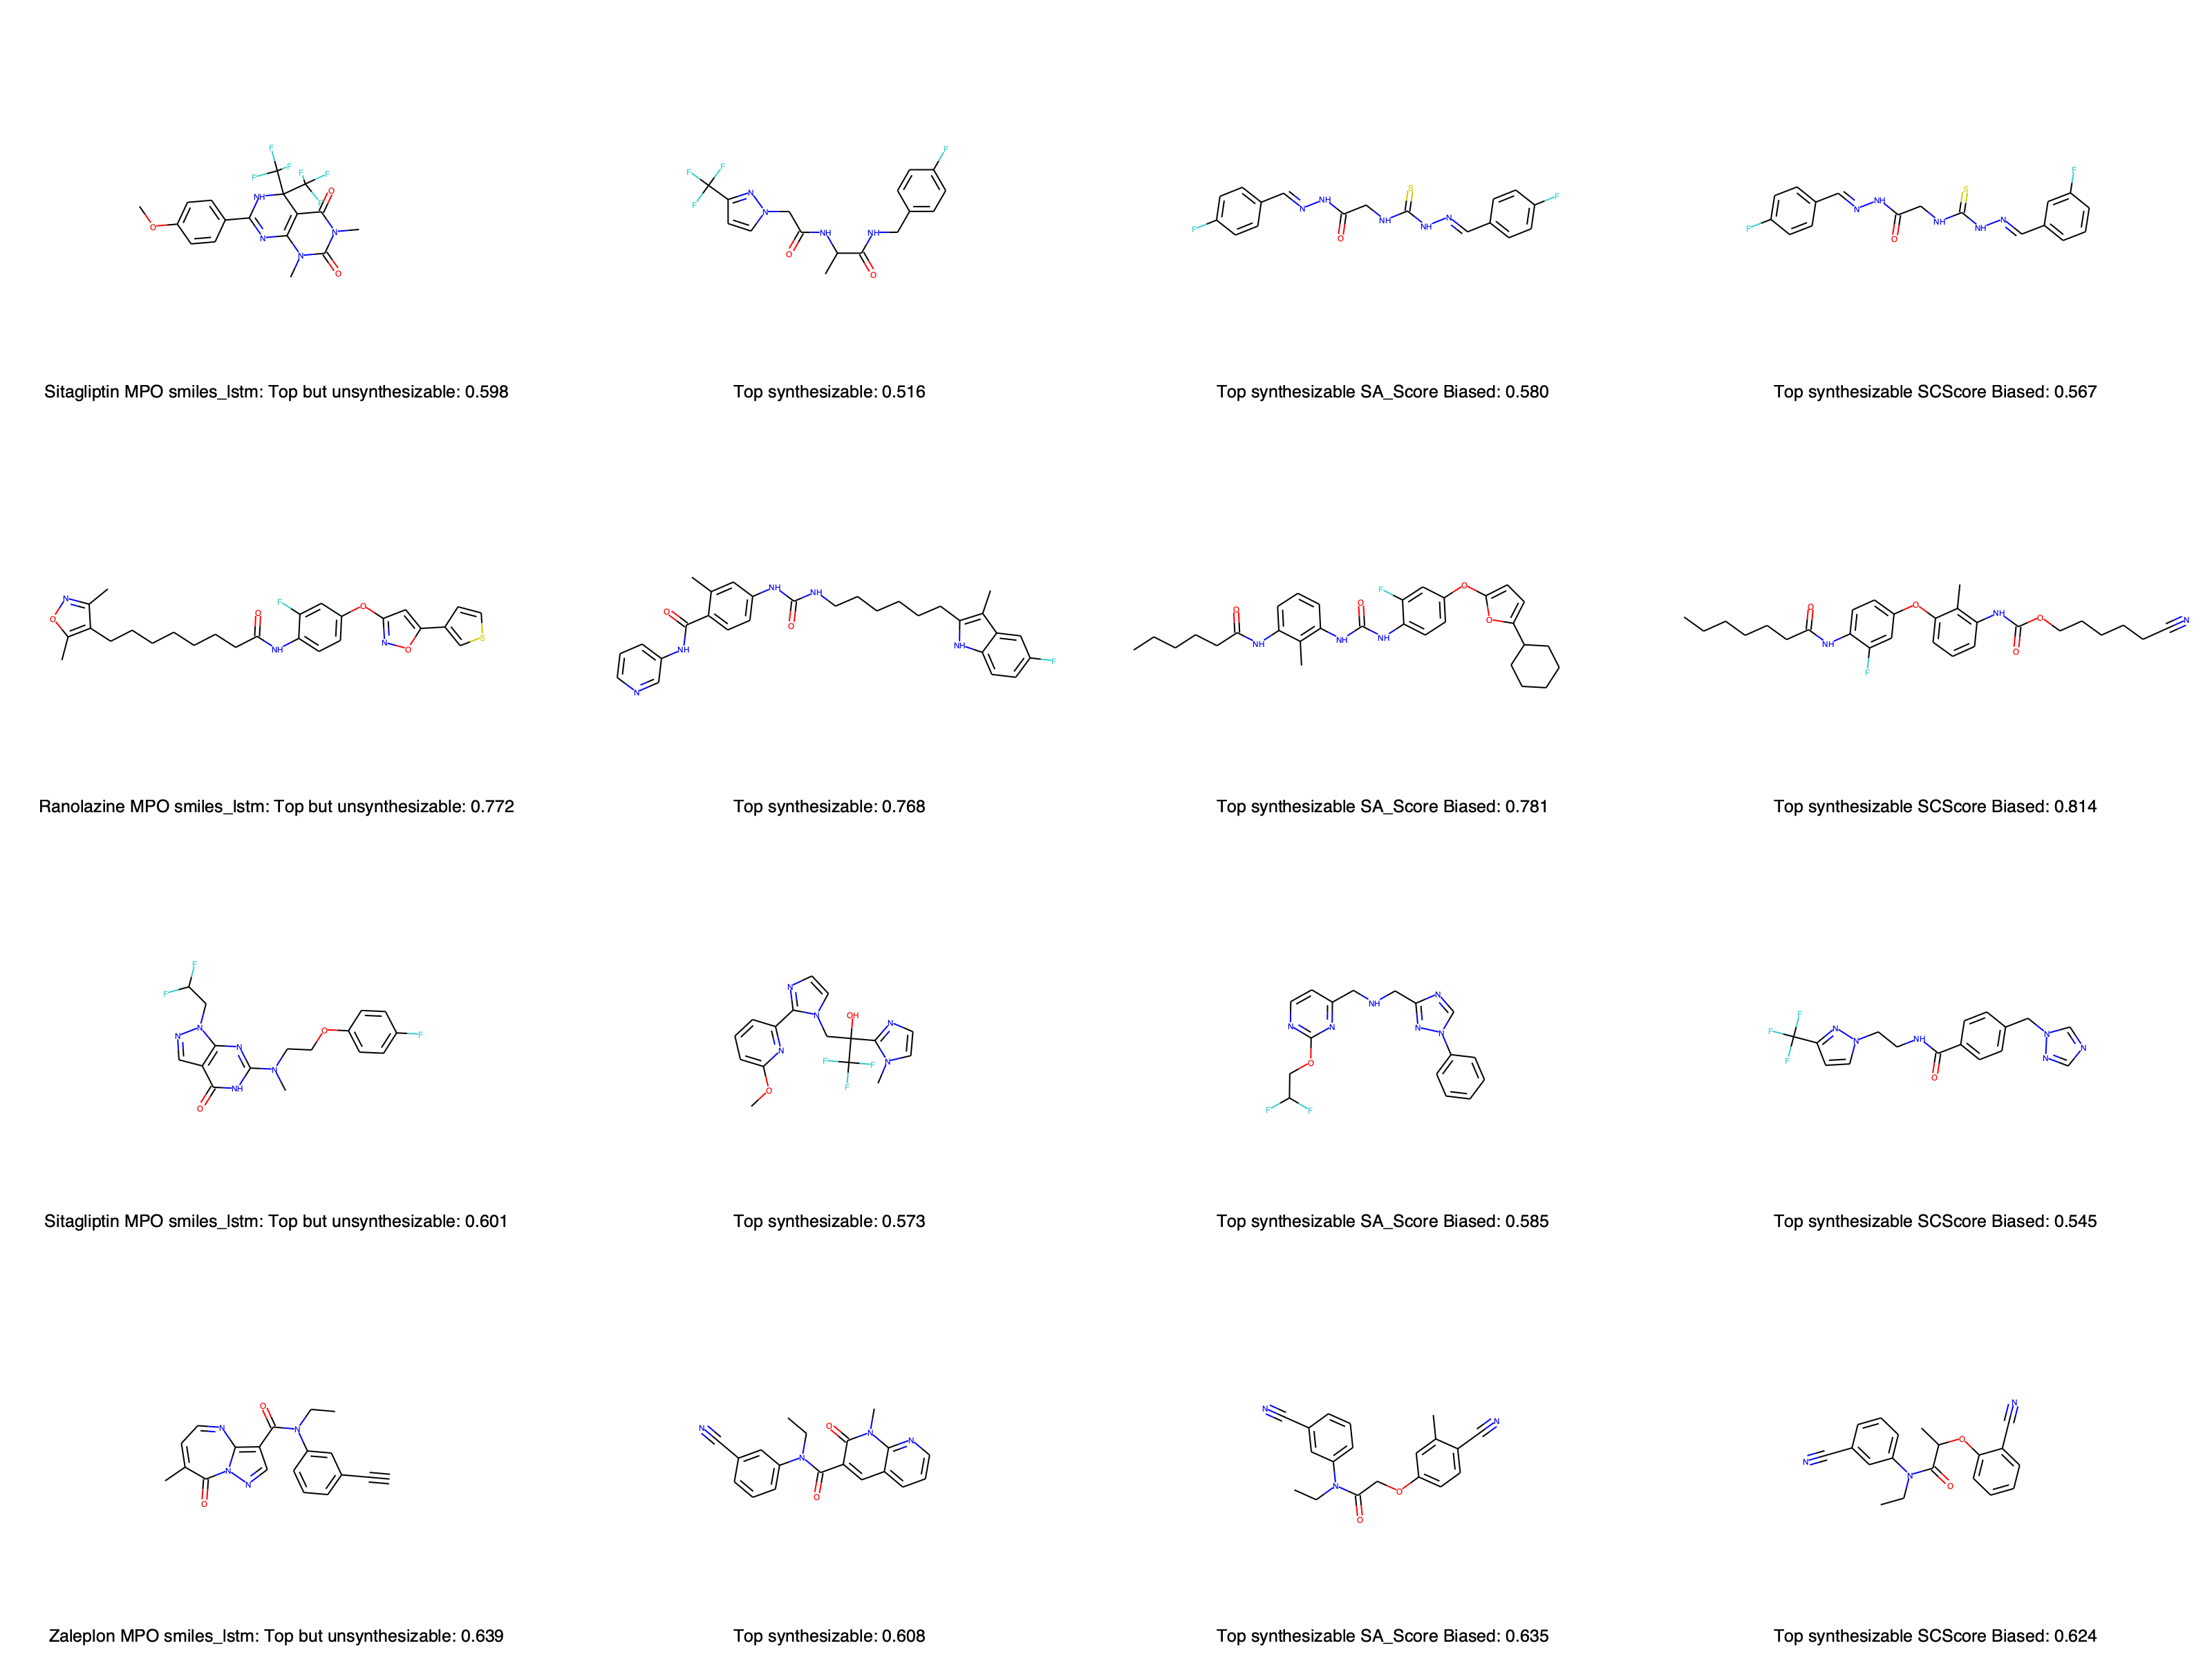

In [21]:
df1 = change_top_cwa
df2 = change_top_cwc
p1 = df1[df1['obj_changed_synth'] > 0.01][df1['syn_changed'] != 2]
p2 = df2[df2['obj_changed_synth'] > 0.01][df2['syn_changed'] != 2]
tmp = list(set(p1.index) | set(p2.index))
tmp = list(np.sort(tmp))
tmp = [22]
mol_list = []
legend_list = []
for x in tmp:
    mol_list  = mol_list + [Chem.MolFromSmiles(df1.SMILES_before[x]), Chem.MolFromSmiles(df1.SMILES_before_synth[x]), Chem.MolFromSmiles(df1.SMILES_after_synth[x]), Chem.MolFromSmiles(df2.SMILES_after_synth[x])]
    legend_list = legend_list + [df1.property[x] + ' ' + df1.method[x] + ': Top but unsynthesizable: ' + str(df1.obj_before[x])[:5], 'Top synthesizable: ' + str(df1.obj_before_synth[x])[:5],
                                     'Top synthesizable SA_Score Biased: ' + str(df1.obj_after[x])[:5], 'Top synthesizable SCScore Biased: ' + str(df2.obj_after[x])[:5]]

tmp1 = tmp
df1 = change_top_mwa
df2 = change_top_mwc
p1 = df1[df1['obj_changed_synth'] > 0.01][df1['syn_changed'] != 2]
p2 = df2[df2['obj_changed_synth'] > 0.01][df2['syn_changed'] != 2]
tmp = list(set(p1.index) | set(p2.index))
tmp = list(np.sort(tmp))
tmp = [10, 22, 26]
tmp2 = tmp
for x in tmp:
    mol_list  = mol_list + [Chem.MolFromSmiles(df1.SMILES_before[x]), Chem.MolFromSmiles(df1.SMILES_before_synth[x]), Chem.MolFromSmiles(df1.SMILES_after_synth[x]), Chem.MolFromSmiles(df2.SMILES_after_synth[x])]
    legend_list = legend_list + [df1.property[x] + ' ' + df1.method[x] + ': Top but unsynthesizable: ' + str(df1.obj_before[x])[:5], 'Top synthesizable: ' + str(df1.obj_before_synth[x])[:5],
                                     'Top synthesizable SA_Score Biased: ' + str(df1.obj_after[x])[:5], 'Top synthesizable SCScore Biased: ' + str(df2.obj_after[x])[:5]]

# img = Draw.MolsToGridImage(mol_list, molsPerRow=4, subImgSize=(400, 300), maxMols=4 * len(tmp1 + tmp2),
#                            legends=legend_list) #, useSVG=True)

# # print(len(tmp1))
# # print(len(tmp2))
# img.save('figure/synth2improve_cm.png')
# img

molsPerRow = 4
subImgSize= (800,600)

nRows = len(mol_list) // molsPerRow
if len(mol_list) % molsPerRow:
    nRows += 1
fullSize = (molsPerRow * subImgSize[0], nRows * subImgSize[1])
d2d = rdMolDraw2D.MolDraw2DCairo(fullSize[0],fullSize[1],subImgSize[0], subImgSize[1])
d2d.drawOptions().legendFontSize=25
d2d.DrawMolecules(mol_list,legends=legend_list)
d2d.FinishDrawing()
open('figure/synth2improve_cm.png','wb+').write(d2d.GetDrawingText())
Image.open('figure/synth2improve_cm.png')

In [25]:
df1 = change_top_cwa
df2 = change_top_cwc
p1 = df1[np.isnan(df1['obj_changed_synth'])]

# p1.loc[1].SMILES_after_synth
# p1.loc[23].SMILES_before
p1.loc[1].SMILES_after_synth

'COc1ccc(OC)c(NC(=O)CNC(=O)Cn2cnc3ccccc3c2=O)c1'

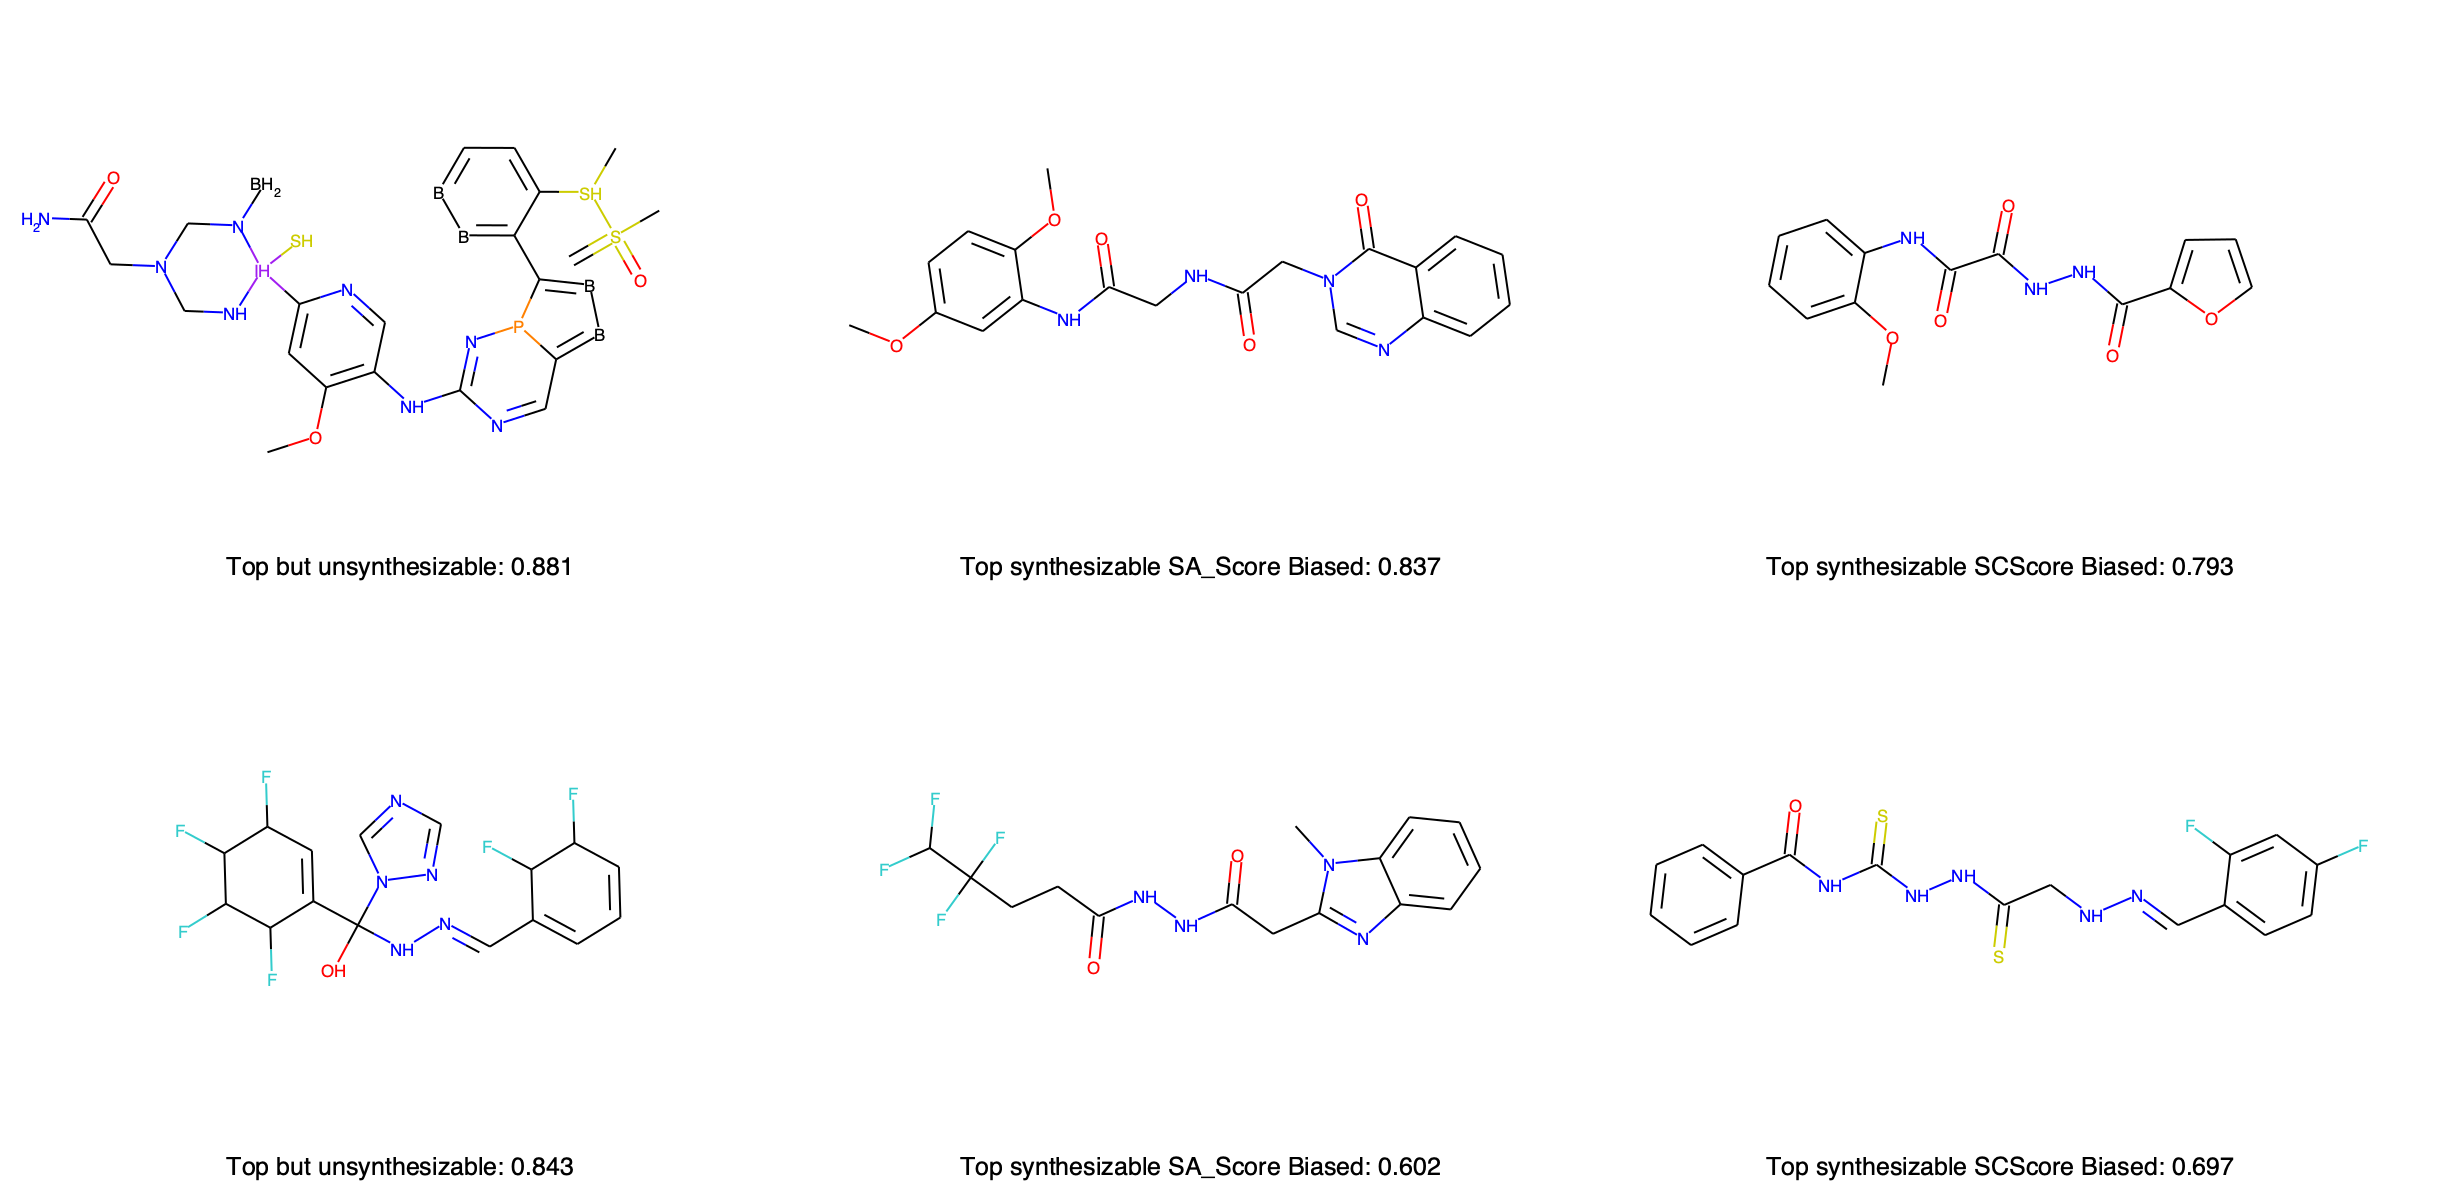

In [16]:
df1 = change_top_cwa
df2 = change_top_cwc
p1 = df1[np.isnan(df1['obj_changed_synth'])]

tmp = p1.loc[[1, 23]]
mol_list = []
legend_list = []

for x in list(tmp.index):
    try:
        mol_list  = mol_list + [Chem.MolFromSmiles(df1.SMILES_before[x]), Chem.MolFromSmiles(df1.SMILES_after_synth[x]), Chem.MolFromSmiles(df2.SMILES_after_synth[x])]
        legend_list = legend_list + ['Top but unsynthesizable: ' + str(df1.obj_before[x])[:5], 
                                     'Top synthesizable SA_Score Biased: ' + str(df1.obj_after[x])[:5], 'Top synthesizable SCScore Biased: ' + str(df2.obj_after[x])[:5]]
    except:
        mol_list  = mol_list + [Chem.MolFromSmiles(df1.SMILES_before[x]), Chem.MolFromSmiles(df1.SMILES_after_synth[x]), Chem.MolFromSmiles(df2.SMILES_after[x])]
        legend_list = legend_list + ['Top but unsynthesizable: ' + str(df1.obj_before[x])[:5], 
                                     'Top synthesizable SA_Score Biased: ' + str(df1.obj_after[x])[:5], 'Top unsynthesizable SCScore Biased: ' + str(df2.obj_after[x])[:5] + '(No synthesizable candidate found)']

molsPerRow = 3
subImgSize= (800,600)

nRows = len(mol_list) // molsPerRow
if len(mol_list) % molsPerRow:
    nRows += 1
fullSize = (molsPerRow * subImgSize[0] + 50, nRows * subImgSize[1])
d2d = rdMolDraw2D.MolDraw2DCairo(fullSize[0],fullSize[1],subImgSize[0], subImgSize[1])
d2d.drawOptions().legendFontSize=25
d2d.DrawMolecules(mol_list,legends=legend_list)
d2d.FinishDrawing()
open('figure/nan2synth_main.png','wb+').write(d2d.GetDrawingText())
Image.open('figure/nan2synth_main.png')

/usr/local/Caskroom/miniconda/base/envs/rdkit/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/Caskroom/miniconda/base/envs/rdkit/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/Caskroom/miniconda/base/envs/rdkit/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/Caskroom/miniconda/base/envs/rdkit/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


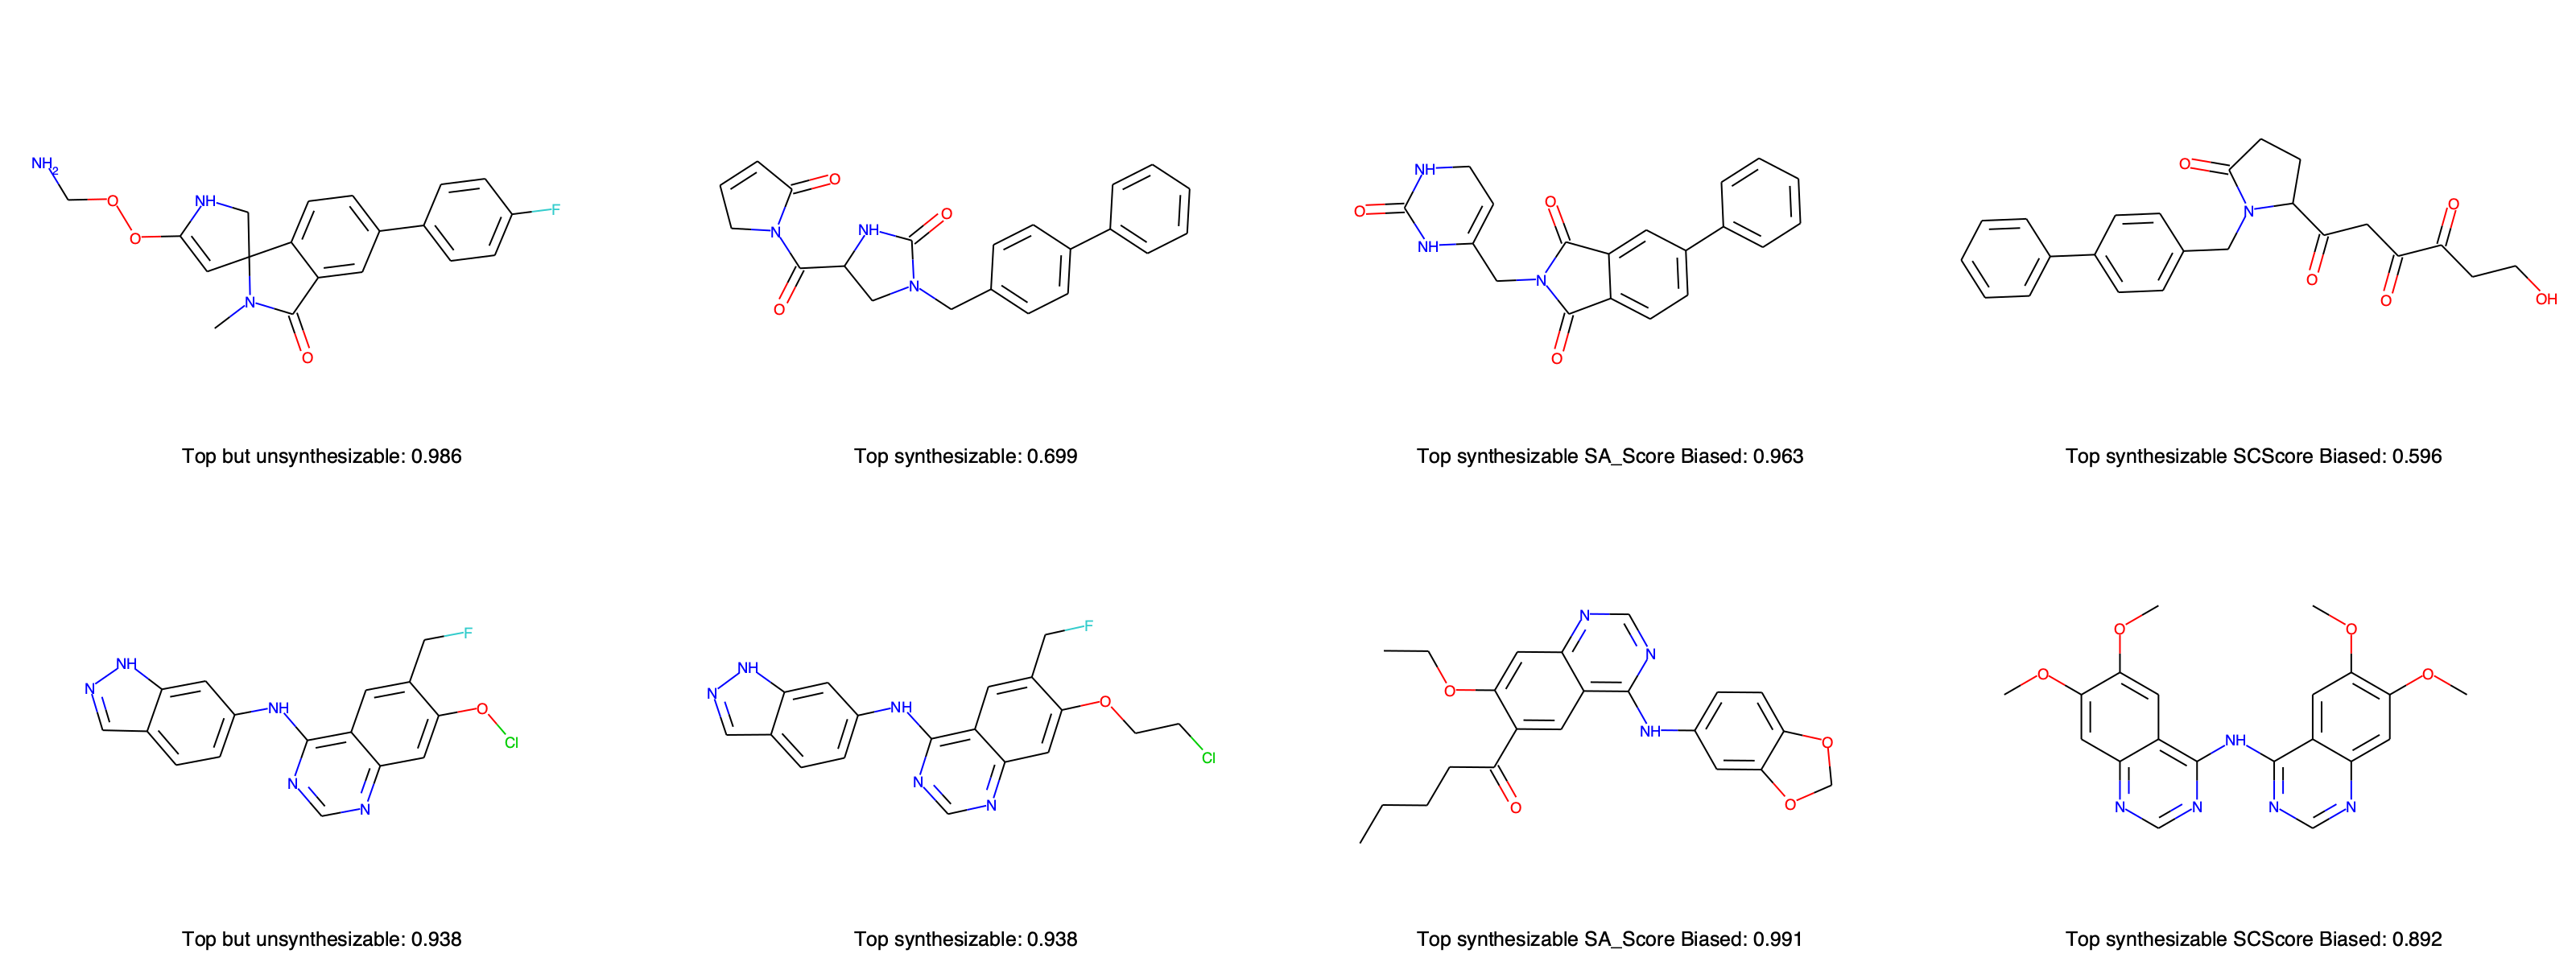

In [30]:
df1 = change_top_cwa
df2 = change_top_cwc
p1 = df1[df1['obj_changed_synth'] > 0.01][df1['syn_changed'] != 2]
p2 = df2[df2['obj_changed_synth'] > 0.01][df2['syn_changed'] != 2]
tmp = list(set(p1.index) | set(p2.index))
tmp = list(np.sort(tmp))
tmp = [31]
mol_list = []
legend_list = []
for x in tmp:
    mol_list  = mol_list + [Chem.MolFromSmiles(df1.SMILES_before[x]), Chem.MolFromSmiles(df1.SMILES_before_synth[x]), Chem.MolFromSmiles(df1.SMILES_after_synth[x]), Chem.MolFromSmiles(df2.SMILES_after_synth[x])]
    legend_list = legend_list + ['Top but unsynthesizable: ' + str(df1.obj_before[x])[:5], 'Top synthesizable: ' + str(df1.obj_before_synth[x])[:5],
                                     'Top synthesizable SA_Score Biased: ' + str(df1.obj_after[x])[:5], 'Top synthesizable SCScore Biased: ' + str(df2.obj_after[x])[:5]]

tmp1 = tmp
df1 = change_top_mwa
df2 = change_top_mwc
p1 = df1[df1['obj_changed_synth'] > 0.01][df1['syn_changed'] != 2]
p2 = df2[df2['obj_changed_synth'] > 0.01][df2['syn_changed'] != 2]
tmp = list(set(p1.index) | set(p2.index))
tmp = list(np.sort(tmp))
tmp = [35]
tmp2 = tmp
for x in tmp:
    mol_list  = mol_list + [Chem.MolFromSmiles(df1.SMILES_before[x]), Chem.MolFromSmiles(df1.SMILES_before_synth[x]), Chem.MolFromSmiles(df1.SMILES_after_synth[x]), Chem.MolFromSmiles(df2.SMILES_after_synth[x])]
    legend_list = legend_list + ['Top but unsynthesizable: ' + str(df1.obj_before[x])[:5], 'Top synthesizable: ' + str(df1.obj_before_synth[x])[:5],
                                     'Top synthesizable SA_Score Biased: ' + str(df1.obj_after[x])[:5], 'Top synthesizable SCScore Biased: ' + str(df2.obj_after[x])[:5]]


    
molsPerRow = 4
subImgSize= (800,600)

nRows = len(mol_list) // molsPerRow
if len(mol_list) % molsPerRow:
    nRows += 1
fullSize = (molsPerRow * subImgSize[0], nRows * subImgSize[1])
d2d = rdMolDraw2D.MolDraw2DCairo(fullSize[0],fullSize[1],subImgSize[0], subImgSize[1])
d2d.drawOptions().legendFontSize=25
d2d.DrawMolecules(mol_list,legends=legend_list)
d2d.FinishDrawing()
open('figure/synth2improve_main.png','wb+').write(d2d.GetDrawingText())
Image.open('figure/synth2improve_main.png')

In [28]:
tmp1, tmp2

([22, 31], [10, 22, 26, 35])

In [7]:
df1 = change_top_cwa
df2 = change_top_cwc

# p1.loc[1].SMILES_after_synth 1 23
# p1.loc[23].SMILES_before
df1.loc[1].SMILES_before, df1.loc[1].SMILES_after_synth, df2.loc[1].SMILES_after_synth

('BN1CN(CC(N)=O)CN[IH]1(S)c1cc(OC)c(Nc2ncc3bbc(-c4bbccc4[SH](C)S(=C)(C)=O)p3n2)cn1',
 'COc1ccc(OC)c(NC(=O)CNC(=O)Cn2cnc3ccccc3c2=O)c1',
 'COc1ccccc1NC(=O)C(=O)NNC(=O)c1ccco1')

In [8]:
df1.loc[23].SMILES_before, df1.loc[23].SMILES_after_synth, df2.loc[23].SMILES_after_synth

('OC(NN=CC1=CC=CC(F)C1F)(C1=CC(F)C(F)C(F)C1F)n1cncn1',
 'Cn1c(CC(=O)NNC(=O)CCC(F)(F)C(F)F)nc2ccccc21',
 'O=C(NC(=S)NNC(=S)CNN=Cc1ccc(F)cc1F)c1ccccc1')

In [9]:
df1 = change_top_cwa
df2 = change_top_cwc

df1.loc[31].SMILES_before, df1.loc[31].SMILES_before_synth, df1.loc[31].SMILES_after_synth, df2.loc[31].SMILES_after_synth

('CN1C(=O)c2cc(-c3ccc(F)cc3)ccc2C12C=C(OOCN)NC2',
 'O=C1NC(C(=O)N2CC=CC2=O)CN1Cc1ccc(-c2ccccc2)cc1',
 'O=C1NCC=C(CN2C(=O)c3ccc(-c4ccccc4)cc3C2=O)N1',
 'O=C(CCO)C(=O)CC(=O)C1CCC(=O)N1Cc1ccc(-c2ccccc2)cc1')

In [10]:
df1 = change_top_mwa
df2 = change_top_mwc

df1.loc[35].SMILES_before, df1.loc[35].SMILES_before_synth, df1.loc[35].SMILES_after_synth, df2.loc[35].SMILES_after_synth

('FCc1cc2c(Nc3ccc4cn[nH]c4c3)ncnc2cc1OCl',
 'FCc1cc2c(Nc3ccc4cn[nH]c4c3)ncnc2cc1OCCCl',
 'CCCCC(=O)c1cc2c(Nc3ccc4c(c3)OCO4)ncnc2cc1OCC',
 'COc1cc2ncnc(Nc3ncnc4cc(OC)c(OC)cc34)c2cc1OC')

In [47]:
p2

,SMILES_before,SMILES_before_synth,SMILES_after,SMILES_after_synth,syn_before,syn_after,syn_changed,obj_before,obj_before_synth,obj_after,obj_after_synth,obj_changed,obj_changed_synth,property,method
22,COc1ccc(C2=Nc3c(c(=O)n(C)c(=O)n3C)C(C(F)(F)F)(...,CC(NC(=O)Cn1ccc(C(F)(F)F)n1)C(=O)NCc1ccc(F)cc1,O=C(CNC(=S)NN=Cc1cccc(F)c1)NN=Cc1ccc(F)cc1,O=C(CNC(=S)NN=Cc1cccc(F)c1)NN=Cc1ccc(F)cc1,0,1,1,0.598389,0.516441,0.567644,0.567644,-0.030745,0.051204,Sitagliptin MPO,smiles_lstm


In [274]:
from guacamol.standard_benchmarks import *

Using TensorFlow backend.


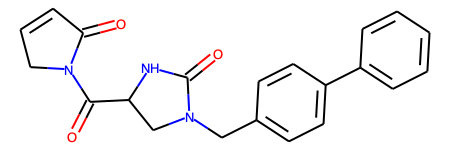

In [2]:
s = 'O=C1NC(C(=O)N2CC=CC2=O)CN1Cc1ccc(-c2ccccc2)cc1'

Chem.MolFromSmiles(s)

In [299]:
obj = valsartan_smarts()
obj.objective.score(s)

0.6999167054986681

In [3]:
df_moses = pd.read_csv('./../synth_gen/data/moses_all.csv')

In [4]:
df_moses

,SMILES,sa_score,sc_score,smiles
0,CCCS(=O)c1ccc2[nH]c(=NC(=O)OC)[nH]c2c1,3.812618,2.971344,38
1,CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1,2.936327,2.551686,36
2,CC1C2CCC(C2)C1CN(CCO)C(=O)c1ccc(Cl)cc1,4.128087,3.202876,38
3,Cc1c(Cl)cccc1Nc1ncccc1C(=O)OCC(O)CO,2.663795,3.023603,35
4,Cn1cnc2c1c(=O)n(CC(O)CO)c(=O)n2C,2.989161,3.580946,32
...,...,...,...,...
1936957,N#Cc1c(Br)cnc(N)c1Br,3.058790,2.151354,20
1936958,COC(=O)c1cc(CNC(=O)OC(C)(C)C)ccc1C,1.877576,2.181203,34
1936959,NC(=O)c1ccc2ccccc2c1Br,1.864829,2.114701,22
1936960,CC(=O)Nc1cccc(-c2nc3cc(C)ccc3[nH]c2=O)c1,2.022148,3.329095,40


In [14]:
df_moses['smiles'] < 10

0          False
1          False
2          False
3          False
4          False
           ...  
1936957    False
1936958    False
1936959    False
1936960    False
1936961    False
Name: smiles, Length: 1936962, dtype: bool

In [24]:
s = pd.Series({
    2: 'sa',
    1: 's'
})

s = {}
s

{}

In [19]:
s = df_moses['SMILES']
s?

Type:        Series
String form:
0            CCCS(=O)c1ccc2[nH]c(=NC(=O)OC)[nH]c2c1
           1              CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n <...>
           1936961     CC(NC(=O)OC(C)(C)C)c1nc(CO)nn1Cc1ccccc1
           Name: SMILES, Length: 1936962, dtype: object
Length:      1936962
File:        /usr/local/Caskroom/miniconda/base/envs/rdkit/lib/python3.7/site-packages/pandas/core/series.py
Docstring:  
One-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be a hashable type. The object
supports both integer- and label-based indexing and provides a host of
methods for performing operations involving the index. Statistical
methods from ndarray have been overridden to automatically exclude
missing data (currently represented as NaN).

Operations between Series (+, -, /, *, **) align values based on their
associated index values-- they need not be the same length. The result
index will be the sorted union of the two indexes.

Parameters
-

In [41]:
def filter_df(df, key, column='SMILES'):
    d = {}
    patt = Chem.MolFromSmarts(key)
    for i, smiles in enumerate(df[column]):
        m = Chem.MolFromSmiles(smiles)
        if m.HasSubstructMatch(patt):
            d[i] = True
        else:
            d[i] = False
    return pd.Series(d)

In [42]:
df_n = df_moses[filter_df(df_moses, 'N=O')]

In [43]:
df_n

,SMILES,sa_score,sc_score,smiles


In [39]:
m = Chem.MolFromSmiles('CCC[N+]([O-])=O')
patt = Chem.MolFromSmarts('N=O')
m.HasSubstructMatch(patt)

True

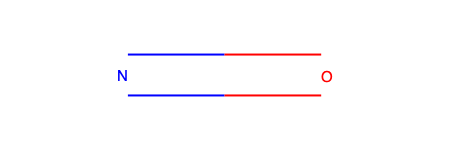

In [40]:
patt

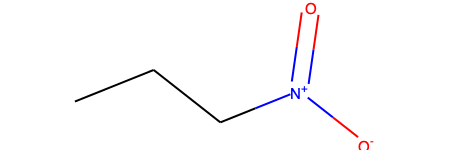

In [36]:
m